# AI Exam (Ex 1)

An advanced aquatic drone, is deployed to collect critical data on marine biodiversity in a coastal region. The drone starts at point $S$, located near the shore, and must navigate to point $G$, a designated marine research site rich in coral reefs and sea life. Along the way, the drone must carefully maneuver through dynamic underwater environments, avoiding hazards and optimizing its energy usage.

The environment includes:  
1. **(O) Open Water:** Normal movement; no additional challenges.  
3. **(F) Seaweed Forests:** Dense vegetation that slows the drone, incurring extra energy costs per move.    
5. **(E) Energy Stations:** Specific points where the drone can recharge its battery, reducing the total cost of the navigation.  


<img src="images/env_ex1.png" style="zoom: 20%;"/>



### Environment Details:

- **Single state problem**: *Actions* are all deterministic, *State* is fully observable. 
- **Grid Representation:** The environment is represented as in the above image (a grid 10x10).  
- $S$ - Start state: The drone's starting point at (0, 0).  
- $G$ - Goal state: the marine research site at (9, 7).
- **Movement Costs:** Each move has a default energy cost of 1.  
- **Hazards:**  
  - **Seaweed Forests:** Entering these zones incurs an additional positive cost.
- **Energy Stations:** Provide a reduction cost when visited, however reaching these cells may require the agent to move far from the goal.  

You can use the following code to explore better the environment

In [1]:
import os, sys 
import tqdm

module_path = os.path.abspath(os.path.join('tools'))
if module_path not in sys.path:
    sys.path.append(module_path)

import gym, envs
from utils.ai_lab_functions import *
import numpy as np
from timeit import default_timer as timer
from tqdm import tqdm as tqdm

env_name = 'AquaticEnv-v0'
env = gym.make(env_name)

env.render()

print("\nActions encoding: ", env.actions)

# Remember that you can know the type of a cell whenever you need by accessing the grid element of the environment:
print("Cell type of start state: ",env.grid[env.startstate])
print("Cell type of goal state: ",env.grid[env.goalstate])
state = 3 # forest
print(f"Cell type of cell {env.state_to_pos(state)}: ",env.grid[state])
state = 17 # energy station
print(f"Cell type of cell {env.state_to_pos(state)}: ",env.grid[state])

[['S' 'O' 'O' 'F' 'F' 'F' 'F' 'O' 'O' 'O']
 ['O' 'F' 'O' 'O' 'O' 'O' 'F' 'E' 'F' 'O']
 ['O' 'O' 'F' 'F' 'F' 'O' 'F' 'F' 'F' 'O']
 ['F' 'O' 'F' 'F' 'E' 'O' 'F' 'O' 'F' 'O']
 ['F' 'O' 'F' 'F' 'F' 'O' 'F' 'O' 'F' 'O']
 ['F' 'E' 'F' 'O' 'O' 'O' 'F' 'E' 'F' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'F' 'F' 'F' 'O']
 ['O' 'F' 'F' 'F' 'O' 'O' 'O' 'F' 'F' 'O']
 ['O' 'O' 'O' 'O' 'F' 'F' 'F' 'F' 'F' 'O']
 ['F' 'F' 'F' 'O' 'O' 'O' 'O' 'G' 'O' 'F']]

Actions encoding:  {0: 'L', 1: 'R', 2: 'U', 3: 'D'}
Cell type of start state:  S
Cell type of goal state:  G
Cell type of cell (0, 3):  F
Cell type of cell (1, 7):  E


#### In this exam you should define a **"cost_dict"** dictionary to define the states that have different cost than 1. For instance:

In [2]:
def get_cost(node_state, grid, cost_dict=None):
    if cost_dict is not None and grid[node_state] in cost_dict: 
        return cost_dict[grid[node_state]] 
    
    return 1

In [3]:
# The cost of moving to a cell of type F is 2, and the cost of moving to a cell of type E is -1.
cost_dict = {'F': 2, 'E': -1}

state = 1 #state in position (0,2)
node=Node(state)
action = 1 #move right
child_state = env.sample(node.state, action)
cost = get_cost(child_state, env.grid, cost_dict)
child = Node( 
    child_state, # node state
    node, # parent node
    node.pathcost + cost, # incremental path cost
) 

print(f"The agent starts in {env.state_to_pos(state)} of type {env.grid[state]}, performs the action {env.actions[action]}, and reaches {env.state_to_pos(child.state)} of type {env.grid[child.state]} with cost {child.pathcost}")


state = 2 #state in position (0,2)
node=Node(state)
action = 1 #move right
child_state = env.sample(node.state, action)
cost = get_cost(child_state, env.grid, cost_dict)
child = Node( 
    child_state, # node state
    node, # parent node
    node.pathcost + cost, # incremental path cost
) 

print(f"The agent starts in {env.state_to_pos(state)} of type {env.grid[state]}, performs the action {env.actions[action]}, and reaches {env.state_to_pos(child.state)} of type {env.grid[child.state]} with cost {child.pathcost}")


state = 16 #state in position (0,2)
node=Node(state)
action = 1 #move right
child_state = env.sample(node.state, action)
cost = get_cost(child_state, env.grid, cost_dict)
child = Node( 
    child_state, # node state
    node, # parent node
    node.pathcost + cost, # incremental path cost
) 

print(f"The agent starts in {env.state_to_pos(state)} of type {env.grid[state]}, performs the action {env.actions[action]}, and reaches {env.state_to_pos(child.state)} of type {env.grid[child.state]} with cost {child.pathcost}")

The agent starts in (0, 1) of type O, performs the action R, and reaches (0, 2) of type O with cost 1
The agent starts in (0, 2) of type O, performs the action R, and reaches (0, 3) of type F with cost 2
The agent starts in (1, 6) of type F, performs the action R, and reaches (1, 7) of type E with cost -1


#### Using the desired algorithm, can you find a setting of *cost_dict* for which the solution returned by the algorithm is the one that avoids all the 'F' states and has the lowest cost to reach the goal state? We recall that the state 'F' should have a positive cost, i.e., cost('F')> 0.

In [4]:
env_name = 'AquaticEnv-v0'
env = gym.make(env_name)

cost_dict = None# your code here
algorithm =  None# your code here

# remember to pass the cost_dict to your algorithm and use it to compute the cost of the children nodes as shown above
#solution, _, _ = algorithm(env, cost_dict)

#### You can visualize and test your solution using the following code:

Solution: 
	Path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7), (8, 7), (9, 7)]


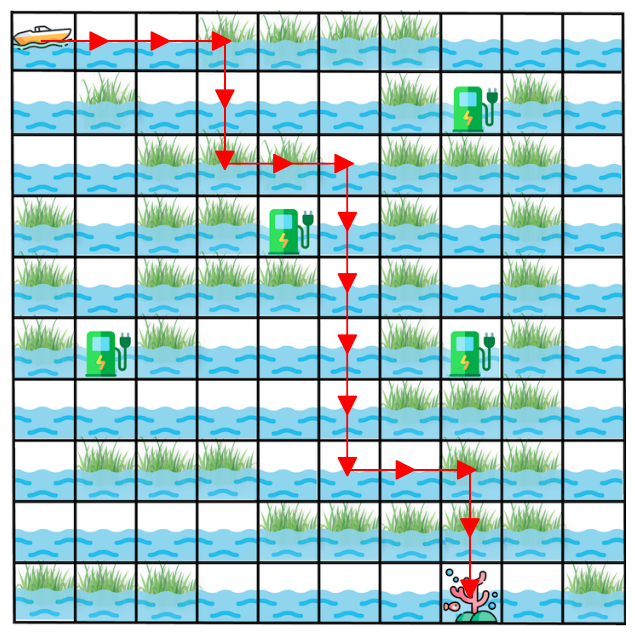

	Time cost: 0
	Space cost: 0

Checking your solution...

Your solution is not correct


In [5]:
# a random solution 
solution = (0, 1, 2, 3, 13, 23, 24, 25, 35, 45, 55, 65, 75, 76, 77, 87, 97)
time_cost = 0
space_cost = 0

print("Solution: ")
path = [env.state_to_pos(s) for s in solution]
print("\tPath:", path)
directions = movements_to_directions(path)
plot_solution(directions, env_name='ex1_render')
print("\tTime cost:", time_cost)
print("\tSpace cost:", space_cost)

print("\nChecking your solution...\n")
valid = check_sol(path)